In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
data = pd.read_csv('weatherAUS.csv')
df = data.copy()

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm']]

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0


In [7]:
df = df.dropna()
df = df.reset_index(drop = True)

In [8]:
df['Location'].nunique()

44

In [9]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm
MinTemp,1.000000,0.730722,0.110986,0.196310,0.201961,0.174692,-0.452112,-0.462707,-0.245643,0.022310
MaxTemp,0.730722,1.000000,-0.070155,0.088774,0.031529,0.043346,-0.329208,-0.423019,-0.523531,-0.498399
Rainfall,0.110986,-0.070155,1.000000,0.132387,0.089173,0.062333,-0.169714,-0.129392,0.225787,0.256859
WindGustSpeed,0.196310,0.088774,0.132387,1.000000,0.601903,0.689313,-0.458755,-0.414750,-0.219663,-0.035175
WindSpeed9am,0.201961,0.031529,0.089173,0.601903,1.000000,0.513806,-0.230518,-0.179900,-0.269315,-0.029012
WindSpeed3pm,0.174692,0.043346,0.062333,0.689313,0.513806,1.000000,-0.300413,-0.261476,-0.132529,0.032667
Pressure9am,-0.452112,-0.329208,-0.169714,-0.458755,-0.230518,-0.300413,1.000000,0.961613,0.142009,-0.027871
Pressure3pm,-0.462707,-0.423019,-0.129392,-0.414750,-0.179900,-0.261476,0.961613,1.000000,0.189555,0.051186
Humidity9am,-0.245643,-0.523531,0.225787,-0.219663,-0.269315,-0.132529,0.142009,0.189555,1.000000,0.674924
Humidity3pm,0.022310,-0.498399,0.256859,-0.035175,-0.029012,0.032667,-0.027871,0.051186,0.674924,1.000000


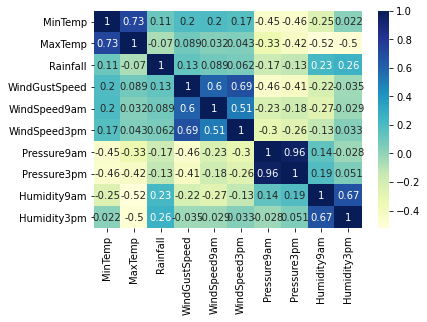

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

In [11]:
location = df['Location'].str.get_dummies().add_prefix('Location_')
windgustdir = df['WindGustDir'].str.get_dummies().add_prefix('WindGustDir_')
df.drop(['Location','WindGustDir'],inplace = True, axis = 1)

In [12]:
df = pd.concat([df, location, windgustdir], axis = 1)

In [13]:
y = df['MaxTemp']
X = df.drop('MaxTemp', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

X_train:  (96292, 69)
y_train:  (96292,)
X_test:  (24074, 69)
y_test:  (24074,)


## Multiple Linear Model

In [15]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MaxTemp   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     9173.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:17:55   Log-Likelihood:            -2.2752e+05
No. Observations:               96292   AIC:                         4.552e+05
Df Residuals:                   96224   BIC:                         4.558e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
MinTemp                       0.8218      0.002    416.169      0.000       0.818       0.826
Rainfall                      0.0035      0.001      3.221      0.001       0.001       0.006
WindGustSpeed                 0.0007      0.001      0.697      0.486      -0.001       0.003
WindSpeed9am                 -0.0987      0.001    -73.822      0.000      -0.101      -0.096
WindSpeed3pm                 -0.0100      0.001     -7.016      0.000      -0.013      -0.007
Pressure9am                   0.4823      0.005     90.903      0.000       0.472       0.493
Pressure3pm                  -0.5408      0.005   -102.893      0.000      -0.551      -0.531
Humidity9am                  -0.0330      0.001    -45.976      0.000      -0.034      -0.032
Humidity3pm                  -0.1397      0.001   -212.637      0.000      -0.141      -0.138
Location_Adelaide            20.0753      0.449     44.757      0.000      19.196      20.954
Location_Albury              22.6066      0.444     50.971      0.000      21.737      23.476
Location_AliceSprings        21.5889      0.443     48.769      0.000      20.721      22.457
Location_BadgerysCreek       23.0572      0.445     51.868      0.000      22.186      23.928
Location_Ballarat            23.5745      0.444     53.146      0.000      22.705      24.444
Location_Bendigo             22.7314      0.443     51.307      0.000      21.863      23.600
Location_Brisbane            20.6425      0.447     46.202      0.000      19.767      21.518
Location_Cairns              21.8573      0.446     49.017      0.000      20.983      22.731
Location_Canberra            22.9067      0.444     51.619      0.000      22.037      23.776
Location_Cobar               20.7354      0.446     46.468      0.000      19.861      21.610
Location_CoffsHarbour        22.3941      0.449     49.821      0.000      21.513      23.275
Location_Dartmoor            23.8192      0.444     53.628      0.000      22.949      24.690
Location_Darwin              21.3046      0.447     47.701      0.000      20.429      22.180
Location_GoldCoast           22.0915      0.451     49.000      0.000      21.208      22.975
Location_Hobart              19.7274      0.442     44.634      0.000      18.861      20.594
Location_Katherine           23.6497      0.453     52.245      0.000      22.762      24.537
Location_Launceston          22.0025      0.442     49.779      0.000      21.136      22.869
Location_Melbourne           20.5898      0.448     45.957      0.000      19.712      21.468
Location_MelbourneAirport    22.0033      0.447     49.267      0.000      21.128      22.879
Location_Mildura             22.3838      0.445     50.266      0.000      21.511      23.257
Location_Moree               22.5077      0.446     50.417      0.000      

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

2.5853849438714014

In [17]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
model.score(X_train, y_train)

0.8646323025238644

In [18]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

2.569890101460329

In [19]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2').mean()

0.8644009759583511

In [20]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

2.585384503248433

## Lasso

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
lasso_model = Lasso().fit(X_train, y_train)
lasso_model.score(X_train, y_train) , lasso_model.score(X_test, y_test)

(0.8238913878398553, 0.8212862027317193)

In [22]:
np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test)))

(2.9312126615569993, 2.949373649008487)

In [23]:
lasso_model_cv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lasso_model_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [24]:
lasso_model_cv.alpha_

1.645645095565498e-05

In [25]:
lasso_optimum = Lasso(alpha= lasso_model_cv.alpha_) 
lasso_optimum.fit(X_train, y_train)

/home/mehmet/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4624.582109742216, tolerance: 469.7905412738233
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1.645645095565498e-05)

In [26]:
lasso_optimum.score(X_train, y_train) , lasso_optimum.score(X_test, y_test)

(0.8646322862716678, 0.8626735159843528)

In [27]:
np.sqrt(mean_squared_error(y_train, lasso_model_cv.predict(X_train))) , np.sqrt(mean_squared_error(y_test, lasso_model_cv.predict(X_test)))

(2.5706338735033425, 2.586586833972037)

## Ridge

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
ridge_model = Ridge().fit(X_train, y_train)
ridge_model.score(X_train, y_train) , ridge_model.score(X_test, y_test)

(0.8643181647382883, 0.8639340191887126)

In [29]:
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) ,np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

(2.572790224875913, 2.573983624530507)

In [30]:
ridge_model = Ridge(alpha=10000).fit(X_train, y_train)
ridge_model.score(X_train, y_train) , ridge_model.score(X_test, y_test)

(0.8491036006798047, 0.849902382055579)

In [31]:
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) , np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test)))

(2.7132071991660704, 2.7034472585903297)

In [32]:
lambdas = np.linspace(10,0.0001,100)

alphaCV = RidgeCV(alphas = lambdas, 
                  scoring = 'neg_mean_squared_error',
                  normalize = True)

alphaCV.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+01, 9.89899091e+00, 9.79798182e+00, 9.69697273e+00,
       9.59596364e+00, 9.49495455e+00, 9.39394545e+00, 9.29293636e+00,
       9.19192727e+00, 9.09091818e+00, 8.98990909e+00, 8.88890000e+00,
       8.78789091e+00, 8.68688182e+00, 8.58587273e+00, 8.48486364e+00,
       8.38385455e+00, 8.28284545e+00, 8.18183636e+00, 8.08082727e+00,
       7.97981818e+00, 7.87880909e+0...
       1.91927273e+00, 1.81826364e+00, 1.71725455e+00, 1.61624545e+00,
       1.51523636e+00, 1.41422727e+00, 1.31321818e+00, 1.21220909e+00,
       1.11120000e+00, 1.01019091e+00, 9.09181818e-01, 8.08172727e-01,
       7.07163636e-01, 6.06154545e-01, 5.05145455e-01, 4.04136364e-01,
       3.03127273e-01, 2.02118182e-01, 1.01109091e-01, 1.00000000e-04]),
        normalize=True, scoring='neg_mean_squared_error')

In [33]:
ridge_tuned = Ridge(alpha= alphaCV.alpha_,
                   normalize = True).fit(X_train,y_train)

ridge_tuned.score(X_train,y_train)

ridge_tuned.score(X_test,y_test), np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

(0.8639291430747814, 2.5740297452613894)

## Polynomial regressions

# 2- Logistic regression

In [34]:
df = data.copy()
df = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'RainToday', 'RainTomorrow']]
df = df.dropna()
df = df.reset_index(drop = True)
location = df['Location'].str.get_dummies().add_prefix('Location_')
windgustdir = df['WindGustDir'].str.get_dummies().add_prefix('WindGustDir_')
raintoday = pd.get_dummies(data = df['RainToday'], drop_first = True).add_prefix('RainToday_')
raintomorrow = pd.get_dummies(data = df['RainTomorrow'], drop_first = True).add_prefix('RainTomorrow_')
df.drop(['Location','WindGustDir', 'RainTomorrow', 'RainToday'],inplace = True, axis = 1)
df = pd.concat([df, location, windgustdir, raintoday, raintomorrow], axis = 1)

In [35]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Pressure9am,Pressure3pm,Humidity9am,Humidity3pm,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,1007.7,1007.1,71.0,22.0,...,0,0,0,0,0,1,0,0,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,1010.6,1007.8,44.0,25.0,...,0,0,0,0,0,0,1,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,1007.6,1008.7,38.0,30.0,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,1017.6,1012.8,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,1010.8,1006.0,82.0,33.0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
y = df['RainTomorrow_Yes']
X = df.drop('RainTomorrow_Yes', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_pred, y_test)

/home/mehmet/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8500585382170932

## Naive Bayes

In [37]:
clf_nb = GaussianNB().fit(X_train, y_train)

print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(clf_nb.score(X_train, y_train)))

print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(clf_nb.score(X_test, y_test)))


Accuracy of GaussianNB classifier on training set: 0.64
Accuracy of GaussianNB classifier on test set: 0.63


## K-Nearest Neighbour (KNN)

In [38]:
knn_model=KNeighborsRegressor().fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.34968028309397103

In [39]:
knn_params={"n_neighbors":[2,3,5,8]}
knn_model=KNeighborsRegressor()
knn_cv_model=GridSearchCV(knn_model,knn_params,cv=10).fit(X,y)
knn_cv_model.best_params_

{'n_neighbors': 8}

In [40]:
knn_tuned=KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train,y_train)
y_pred_tuned=knn_tuned.predict(X_test)
y_test_error_tuned=np.sqrt(mean_squared_error(y_test,y_pred_tuned))
y_test_error_tuned

0.33893751301982233

## Support Vector Regression

In [41]:
svr_model=SVR("linear").fit(X_train,y_train)
y_pred=svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

/home/mehmet/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
svr_model=SVR("linear")
svr_params={"C":np.linspace(0,1,5)}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)
svr_tuned=SVR(**svr_cv_model.best_params_).fit(X_train,y_train)
y_pred=svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))